# TensorFlow and Keras Classification Model


## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('DATA/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


# EDA

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

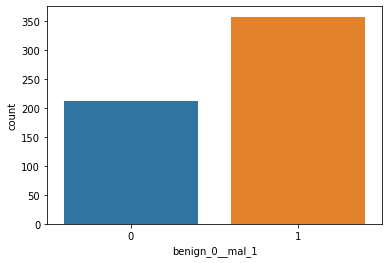

In [6]:
sns.countplot(x='benign_0__mal_1',data=df)

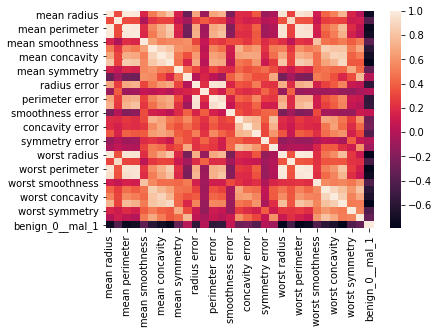

In [7]:
sns.heatmap(df.corr())

In [8]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

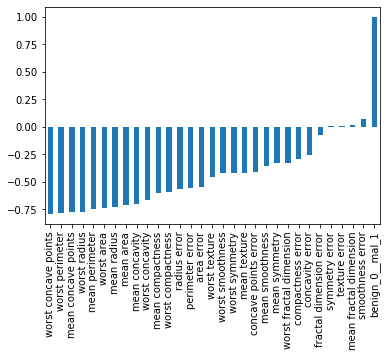

In [9]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

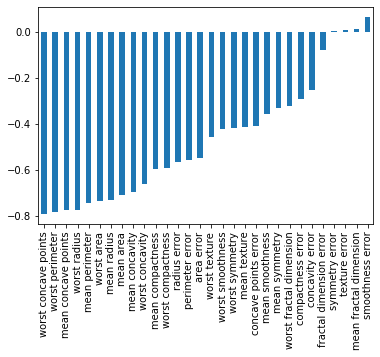

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

# Train Test Split

In [11]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

# Scaling Data

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [17]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout           

In [20]:
X_train.shape

(426, 30)

In [21]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

# Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [23]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.7094 - val_loss: 0.6754
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6652 - val_loss: 0.6358
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6243 - val_loss: 0.5923
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5793 - val_loss: 0.5405
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5257 - val_loss: 0.4843
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4734 - val_loss: 0.4322
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4216 - val_loss: 0.3837
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3772 - val_loss: 0.3428
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3377 - val_loss: 0.3036
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3060 - val_loss: 0.2751
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.1234
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0566 - val_loss: 0.1234
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.1309
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0526 - val_loss: 0.1205
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0532 - val_loss: 0.1239
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0482 - val_loss: 0.1297
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0499 - val_loss: 0.1183
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.1370
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.1262
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0478 - val_loss: 0.1259
Epoch 93/600


14/14 [==============================] - 0s 2ms/step - loss: 0.0398 - val_loss: 0.1531
Epoch 165/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0422 - val_loss: 0.1415
Epoch 166/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0344 - val_loss: 0.1379
Epoch 167/600
14/14 [==============================] - ETA: 0s - loss: 0.008 - 0s 2ms/step - loss: 0.0346 - val_loss: 0.1441
Epoch 168/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0320 - val_loss: 0.1387
Epoch 169/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0330 - val_loss: 0.1407
Epoch 170/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0311 - val_loss: 0.1385
Epoch 171/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0336 - val_loss: 0.1389
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0321 - val_loss: 0.1515
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0308

Epoch 245/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0198 - val_loss: 0.1500
Epoch 246/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0200 - val_loss: 0.1519
Epoch 247/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0198 - val_loss: 0.1437
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0187 - val_loss: 0.1644
Epoch 249/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0186 - val_loss: 0.1493
Epoch 250/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0188 - val_loss: 0.1532
Epoch 251/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0192 - val_loss: 0.1503
Epoch 252/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0227 - val_loss: 0.1590
Epoch 253/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0188 - val_loss: 0.1512
Epoch 254/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0189 - val_los

14/14 [==============================] - 0s 2ms/step - loss: 0.0111 - val_loss: 0.1720
Epoch 327/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0114 - val_loss: 0.1749
Epoch 328/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0115 - val_loss: 0.1722
Epoch 329/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0110 - val_loss: 0.1730
Epoch 330/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0111 - val_loss: 0.1820
Epoch 331/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0127 - val_loss: 0.1743
Epoch 332/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0113 - val_loss: 0.1796
Epoch 333/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0111 - val_loss: 0.1756
Epoch 334/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0107 - val_loss: 0.1749
Epoch 335/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0115 - val_loss: 0.1774
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 0.0069 - val_loss: 0.2061
Epoch 408/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.2180
Epoch 409/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.2104
Epoch 410/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.2119
Epoch 411/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.2105
Epoch 412/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.2149
Epoch 413/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.2188
Epoch 414/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.2159
Epoch 415/600
14/14 [==============================] - ETA: 0s - loss: 0.002 - 0s 2ms/step - loss: 0.0099 - val_loss: 0.2383
Epoch 416/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0087

14/14 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.2860
Epoch 489/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 0.2744
Epoch 490/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0118 - val_loss: 0.3898
Epoch 491/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0228 - val_loss: 0.2807
Epoch 492/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.2497
Epoch 493/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.2340
Epoch 494/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.2587
Epoch 495/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.2416
Epoch 496/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.2443
Epoch 497/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0047 - val_loss: 0.2471
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.3282
Epoch 570/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.3398
Epoch 571/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.3460
Epoch 572/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.3525
Epoch 573/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.3405
Epoch 574/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.3489
Epoch 575/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0043 - val_loss: 0.3330
Epoch 576/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0040 - val_loss: 0.3828
Epoch 577/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.3545
Epoch 578/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.3558
Epoc

In [24]:
# model.history.history

In [25]:
model_loss = pd.DataFrame(model.history.history)

In [26]:
# model_loss

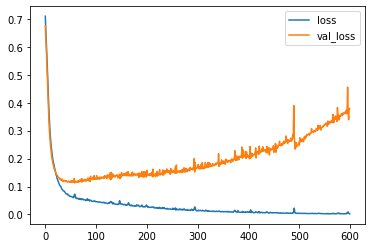

In [27]:
model_loss.plot()

## Example Two: Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [28]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [31]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6779 - val_loss: 0.6638
Epoch 2/600
14/14 [==============================] - 0s 1ms/step - loss: 0.6511 - val_loss: 0.6388
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6243 - val_loss: 0.6118
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5952 - val_loss: 0.5807
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5618 - val_loss: 0.5433
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5219 - val_loss: 0.4983
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4782 - val_loss: 0.4555
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4362 - val_loss: 0.4123
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3957 - val_loss: 0.3718
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3588 - val_loss: 0.3337
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.0581 - val_loss: 0.1061
Epoch 81/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0607 - val_loss: 0.1170
Epoch 82/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0593 - val_loss: 0.1054
Epoch 83/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0563 - val_loss: 0.1153
Epoch 00083: early stopping


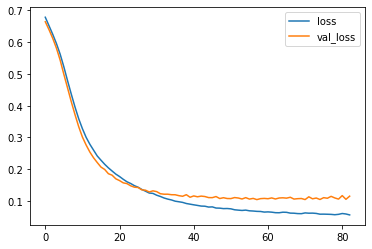

In [32]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Example Three: Adding in DropOut Layers

In [33]:
from tensorflow.keras.layers import Dropout

In [34]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [35]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 12ms/step - loss: 0.6886 - val_loss: 0.6623
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6590 - val_loss: 0.6367
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6343 - val_loss: 0.6085
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6187 - val_loss: 0.5644
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5716 - val_loss: 0.5260
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5512 - val_loss: 0.4871
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5459 - val_loss: 0.4645
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5146 - val_loss: 0.4376
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4946 - val_loss: 0.4083
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4725 - val_loss: 0.3859
Epoch 11

14/14 [==============================] - 0s 2ms/step - loss: 0.1115 - val_loss: 0.0917
Epoch 81/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1311 - val_loss: 0.0847
Epoch 82/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1001 - val_loss: 0.0910
Epoch 83/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1086 - val_loss: 0.0856
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0952 - val_loss: 0.0881
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1139 - val_loss: 0.0963
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1028 - val_loss: 0.0881
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1122 - val_loss: 0.0902
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1198 - val_loss: 0.0901
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0995 - val_loss: 0.0901
Epoch 90/600


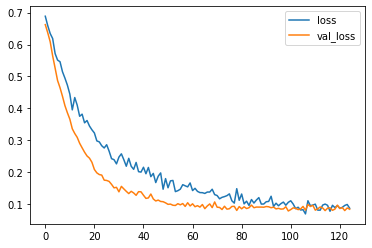

In [36]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()